<center><h1>Test Gemma 3 270M on CPU</h1></center>
<center><img src="https://storage.googleapis.com/gweb-developer-goog-blog-assets/images/Gemma3-270M_Wagtail_RD2-V02.original.jpg" width=800></img></center>

# Introduction

We will test Gemma 3 270 M (yes, that compact!), Keras framework, instruction tunning.  

We perform these tests on CPU only.  

We will test the model with a number of various tasks, as following:
- Simple prompt
- Batch prompting
- Fit with one batch
- Questions about history
- A variety of questions from popular culture
- Few languages different than English
- Simple math
- Simple coding questions

## Why Small Language Models (SLM) are important?

While giant LLMs grab the headlines, Small Language Models (SLMs) can be the real game-changers for engineers deploying NLP in the real world:

- **Lower Latency** – Smaller parameter counts mean faster inference, enabling near real-time responses—critical for chatbots, search, and support tools.
- **Lower Cost** – Less compute required means cheaper cloud bills and the ability to run on smaller hardware, even edge devices.
- **Easier Scaling** – You can serve more concurrent users without ballooning infrastructure needs.
- **Data Privacy & Control** – Running SLMs on-prem or in a controlled environment reduces dependence on external APIs and can meet strict compliance requirements.
- **Targeted Fine-Tuning** – SLMs can be fine-tuned quickly on domain-specific data, making them precise specialists without excessive training cost.


## About Gemma 3 270M

Gemma 3 270M is the Keras implementation of the Gemma 3 270M base model. Runs on JAX, TensorFlow and PyTorch with Keras 3. 

Gemma 3 270M is available from [Kaggle Models](https://www.kaggle.com/models/keras/gemma3/keras/gemma3_instruct_270m) or [Keras Hub](https://keras.io/keras_hub/) in 2 variants:

- **gemma3_270m** - This base model has not been instruction-tuned, and is a good choice for developers who want to fully control their fine-tuning process.
- **gemma3_instruct_270m** - This base model is instruction-tuned, and can be used for chatting and following prompts.
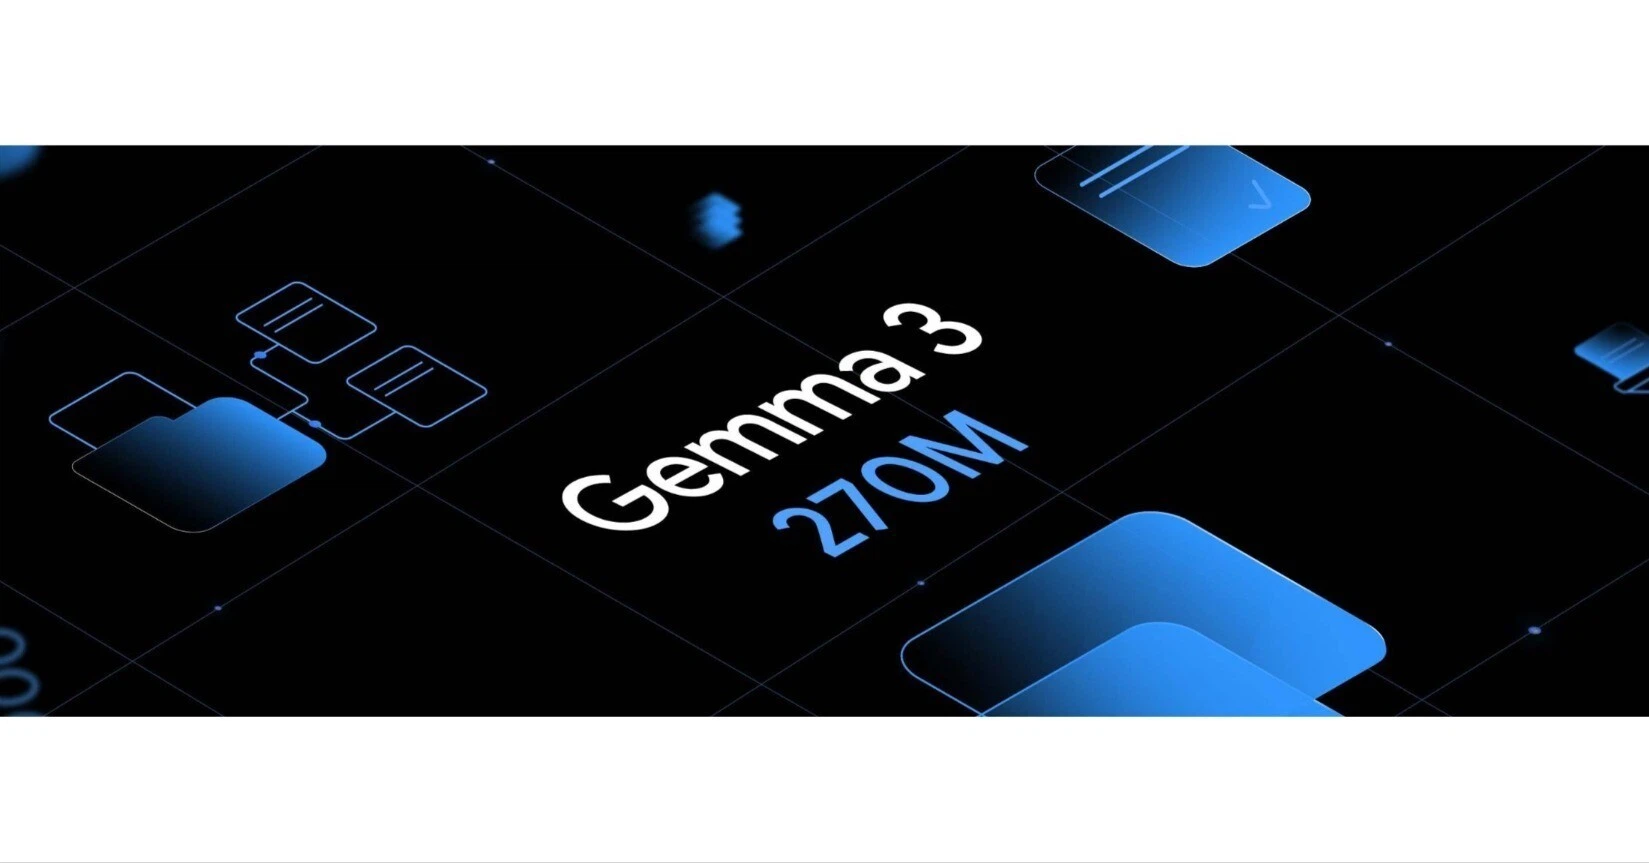

# Install dependencies

In [1]:
!pip install -U keras-hub
!pip install -U keras

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 947.9/947.9 kB 25.2 MB/s eta 0:00:00
  Attempting uninstall: keras-hub
    Found existing installation: keras-hub 0.18.1
    Uninstalling keras-hub-0.18.1:
      Successfully uninstalled keras-hub-0.18.1
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
keras-nlp 0.18.1 requires keras-hub==0.18.1, but you have keras-hub 0.22.1 which is incompatible.
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.4/1.4 MB 29.8 MB/s eta 0:00:00
  Attempting uninstall: keras
    Found existing installation: keras 3.8.0
    Uninstalling keras-3.8.0:
      Successfully uninstalled keras-3.8.0
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
keras-nlp 0.18.1 requires keras-hub==0.18.1, but you have keras-hub 0.22.1 whic

# Import packages

In [2]:
import keras
import keras_hub
import numpy as np
from time import time

2025-08-16 19:56:50.075161: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:477] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
E0000 00:00:1755374210.303724      13 cuda_dnn.cc:8310] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
E0000 00:00:1755374210.371037      13 cuda_blas.cc:1418] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered


# Load the model

In [3]:
gemma_lm = keras_hub.models.Gemma3CausalLM.from_preset("/kaggle/input/gemma3/keras/gemma3_instruct_270m/4")

2025-08-16 19:57:08.892601: E external/local_xla/xla/stream_executor/cuda/cuda_driver.cc:152] failed call to cuInit: INTERNAL: CUDA error: Failed call to cuInit: UNKNOWN ERROR (303)
normalizer.cc(51) LOG(INFO) precompiled_charsmap is empty. use identity normalization.


# Generate text

## Generate from one prompt

Let's start by generating a text sequence.

In [4]:
gemma_lm.generate("Keras is a", max_length=30)

I0000 00:00:1755374261.362204      59 service.cc:148] XLA service 0x7e78b8caed50 initialized for platform Host (this does not guarantee that XLA will be used). Devices:
I0000 00:00:1755374261.362896      59 service.cc:156]   StreamExecutor device (0): Host, Default Version
I0000 00:00:1755374261.416295      59 device_compiler.h:188] Compiled cluster using XLA!  This line is logged at most once for the lifetime of the process.


'Keras is a powerful and versatile library for building and training machine learning models. It provides a comprehensive set of tools and techniques for data preprocessing,'

## Generate from a batch of prompts

Let's generate now text for a sequence of prompts.

In [5]:
# Generate with batched prompts.
gemma_lm.generate(["Keras is a", "In the begining", "Call me Ishmael"], max_length=30)

['Keras is a powerful and versatile library for building and training machine learning models. It provides a comprehensive set of tools and techniques for data preprocessing,',
 'In the begining of the 2020s, the world was still grappling with the complexities of the digital age.  We were',
 'Call me Ishmael, a name that has been whispered in the halls of the ancient world.\n\nI am Ishmael, a prophet of the']

Let's verify how fast is this version of Gemma 3 models.

In [6]:
def test_gemma(inputs, max_length=30):
    s_t = time()
    output = gemma_lm.generate(inputs, max_length=max_length)
    e_t = time()
    print(output)
    print(f"Total time: {round(e_t-s_t, 2)} sec.")    
    

In [7]:
test_gemma("Keras is a")

Keras is a powerful and versatile library for building and training machine learning models. It provides a comprehensive set of tools and techniques for data preprocessing,
Total time: 2.14 sec.


In [8]:
test_gemma(["Keras is a", "In the begining", "Call me Ishmael"])

['Keras is a powerful and versatile library for building and training machine learning models. It provides a comprehensive set of tools and techniques for data preprocessing,', 'In the begining of the 2020s, the world was still grappling with the complexities of the digital age.  We were', 'Call me Ishmael, a name that has been whispered in the halls of the ancient world.\n\nI am Ishmael, a prophet of the']
Total time: 4.25 sec.


## Compile `generate` function with a custom sampler

We will compile the `generate` function with a sampler passed as a string.

In [9]:
gemma_lm = keras_hub.models.Gemma3CausalLM.from_preset("/kaggle/input/gemma3/keras/gemma3_instruct_270m/4")
gemma_lm.compile(sampler="top_k")

Let's test it.

In [10]:
gemma_lm.generate("The fox jumped over", max_length=30)

'The fox jumped over the fence and then landed on the grass. The fox was very quick and fast, and the fox quickly and quickly landed on'

## Call `fit()` function on a single batch

In [11]:
gemma_lm = keras_hub.models.Gemma3CausalLM.from_preset("/kaggle/input/gemma3/keras/gemma3_instruct_270m/4")

features = {
    "prompts": ["Capital of Romania?", "Capital of France?", "Capital of Germany?", "Capital of Spain?"],
    "responses": ["Bucharest", "Paris", "Berlin", "Madrid"]
}

gemma_lm.fit(x=features, batch_size=1)



/usr/local/lib/python3.11/dist-packages/tensorflow/python/framework/indexed_slices.py:446: UserWarning: Converting sparse IndexedSlices to a dense Tensor with 167772160 elements. This may consume a large amount of memory.
  warnings.warn(


4/4 ━━━━━━━━━━━━━━━━━━━━ 194s 23s/step - loss: 0.0166 - sparse_categorical_accuracy: 0.2222


In [12]:
gemma_lm.generate("Capital of France?", max_length=12)

'Capital of France?Paris'

In [13]:
gemma_lm.generate("Capital of Rwanda?", max_length=12)

'Capital of Rwanda? Kampala'

In [14]:
gemma_lm.generate("Capital of UK?", max_length=12)

'Capital of UK?London'

Let's create a function to display nicely the response.

In [15]:
from IPython.display import display, Markdown

def colorize_text(text):
    for word, color in zip(["Question", "Response","Execution time"], ["blue", "red", "green"]):
        text = text.replace(f"{word}:", f"\n\n**<font color='{color}'>{word}:</font>**")
    return text



def test_qa_gemma(question, max_length=30):
    s_t = time()
    output = gemma_lm.generate(question, max_length=max_length)
    e_t = time()
    response = output.replace(question, "")
    return f"Question: {question} Response: {response} Execution time: {round(e_t-s_t, 2)} sec."


def test_gemma_format(question, max_length=30):

    display(Markdown(colorize_text(test_qa_gemma(question, max_length))))

# Test with history questions

In [16]:
gemma_lm = keras_hub.models.Gemma3CausalLM.from_preset("/kaggle/input/gemma3/keras/gemma3_instruct_270m/4")

In [17]:
test_gemma_format("Who was George Washington?", max_length=32)



**<font color='blue'>Question:</font>** Who was George Washington? 

**<font color='red'>Response:</font>** 

George Washington was a prominent figure in the American Revolution. He was a commander of the Continental Army and a key figure in the 

**<font color='green'>Execution time:</font>** 21.71 sec.

In [18]:
test_gemma_format("Between what years was WWI?", max_length=32)



**<font color='blue'>Question:</font>** Between what years was WWI? 

**<font color='red'>Response:</font>** 

WWI was a global conflict that began in 1914 and lasted for 10 years.
 

**<font color='green'>Execution time:</font>** 2.28 sec.

In [19]:
test_gemma_format("When was the war of 30 years?", max_length=32)



**<font color='blue'>Question:</font>** When was the war of 30 years? 

**<font color='red'>Response:</font>** 

The war of 30 years was a period of intense conflict between the United States and Great Britain 

**<font color='green'>Execution time:</font>** 1.82 sec.

In [20]:
test_gemma_format("In what year was assasinated JFK?", max_length=32)



**<font color='blue'>Question:</font>** In what year was assasinated JFK? 

**<font color='red'>Response:</font>** 

The answer is 1963.
<end_of_turn> 

**<font color='green'>Execution time:</font>** 1.09 sec.

# Test with popular culture questions

In [21]:
test_gemma_format("Name an album by Beatles.", max_length=32)



**<font color='blue'>Question:</font>** Name an album by Beatles. 

**<font color='red'>Response:</font>** 

**Answer:** The Beatles

**Explanation:** The Beatles were a hugely successful and influential band, known for their innovative songwriting 

**<font color='green'>Execution time:</font>** 2.09 sec.

In [22]:
test_gemma_format("Name a movie of Charlie Chaplin.", max_length=32)



**<font color='blue'>Question:</font>** Name a movie of Charlie Chaplin. 

**<font color='red'>Response:</font>** 

A)  The Great Showman.
B)  The Tram Ride.
C)  The Chaplin Film 

**<font color='green'>Execution time:</font>** 2.01 sec.

In [23]:
test_gemma_format("When was released first Star Wars movie?", max_length=32)



**<font color='blue'>Question:</font>** When was released first Star Wars movie? 

**<font color='red'>Response:</font>** 

Star Wars: Episode IV - A New Hope was released on November 20, 2015 

**<font color='green'>Execution time:</font>** 1.98 sec.

In [24]:
test_gemma_format("Who was Princess Diana?", max_length=32)



**<font color='blue'>Question:</font>** Who was Princess Diana? 

**<font color='red'>Response:</font>** 

Princess Diana was a British princess who was married to Prince Charles. She was known for her flamboyant personality and her love of fashion 

**<font color='green'>Execution time:</font>** 2.24 sec.

# Test with multi-language

In [25]:
test_gemma_format("Quelle est la capitale du France?", max_length=32)



**<font color='blue'>Question:</font>** Quelle est la capitale du France? 

**<font color='red'>Response:</font>** 

La capitale du France est Paris.
La capitale du France est Paris.
La capitale du France est Paris. 

**<font color='green'>Execution time:</font>** 2.04 sec.

In [26]:
test_gemma_format("Welche Farbe hat der Himmel?", max_length=32)



**<font color='blue'>Question:</font>** Welche Farbe hat der Himmel? 

**<font color='red'>Response:</font>** 

Die Farbe des Himmels ist bekannt als "blau".
Die Farbe des Himmels ist bekannt als " 

**<font color='green'>Execution time:</font>** 2.03 sec.

In [27]:
test_gemma_format("ハローキティとは誰ですか", max_length=64)



**<font color='blue'>Question:</font>** ハローキティとは誰ですか 

**<font color='red'>Response:</font>** ？

ハローキティは、1980年代後半に、アメリカの音楽界で人気を博した、アメリカのロックバンド「ハローキティ・ズー」のメンバーです。

ハローキティ・ズーは、198 

**<font color='green'>Execution time:</font>** 24.12 sec.

# Test with simple math

In [28]:
test_gemma_format("How much is 22 x 22? Just give the answer.", max_length=32)



**<font color='blue'>Question:</font>** How much is 22 x 22? Just give the answer. 

**<font color='red'>Response:</font>** 

**Answer:** 484
<end_of_turn> 

**<font color='green'>Execution time:</font>** 0.94 sec.

In [29]:
test_gemma_format("How much is 49 - 12? Just give the answer.", max_length=64)



**<font color='blue'>Question:</font>** How much is 49 - 12? Just give the answer. 

**<font color='red'>Response:</font>** 

**Answer:** 51
<end_of_turn> 

**<font color='green'>Execution time:</font>** 0.97 sec.

In [30]:
test_gemma_format("Area of a circle with radius 10? Just return the result.", max_length=12)



**<font color='blue'>Question:</font>** Area of a circle with radius 10? Just return the result. 

**<font color='red'>Response:</font>** Area of a circle with radius 10? Just 

**<font color='green'>Execution time:</font>** 19.55 sec.

# Try some coding

In [31]:
test_gemma_format("Write a Python code to calculate the area of a circle with radius r.", max_length=256)



**<font color='blue'>Question:</font>** Write a Python code to calculate the area of a circle with radius r. 

**<font color='red'>Response:</font>**  The area of a circle is given by the formula: A = πr²

The code should also include a clear and concise explanation of the code's purpose and how it works.
```python
import math

def calculate_circle_area(radius):
    """Calculates the area of a circle.

    Args:
        radius: The radius of the circle.

    Returns:
        The area of the circle.
    """
    area = math.pi * radius * radius
    return area

# Example usage
radius = 5
area = calculate_circle_area(radius)
print("The area of the circle with radius", radius, "is:", area)
```
**Explanation:**

1.  **`import math`:** This line imports the `math` module, which provides mathematical functions.
2.  **`def calculate_circle_area(radius):`:** This defines a function named `calculate_circle_area` that takes one argument: `radius`.
3.  **`area = math.pi * radius * radius`:** This is the core of the function.
 

**<font color='green'>Execution time:</font>** 41.24 sec.

In [32]:
test_gemma_format("Write a Python code to calculate the n factorial.", max_length=128)



**<font color='blue'>Question:</font>** Write a Python code to calculate the n factorial. 

**<font color='red'>Response:</font>** 

```python
def factorial(n):
    """Calculates the n factorial.

    Args:
        n: The number to calculate the factorial for.

    Returns:
        The n-th factorial.
    """
    if n == 0:
        return 1
    else:
        return n * factorial(n - 1)
```

```python
def factorial_optimized(n):
    """Calculates the n factorial using optimized algorithm.

    Args:
        n: The number to calculate the factorial 

**<font color='green'>Execution time:</font>** 27.94 sec.

# Closing remarks


The model Gemma 3 270M is an astonishing compact model, yet valuable, with good performance for some tasks. It runs quite fast on CPU, and it is really simple to use.
Few remarcable features:
- support of batch inference (much faster than sequential for each item in the batch)
- compilation of generate function with custom sampler
- apply fit function

 I tested the model with:
 - history questions
 - popular culture
 - multilanguage
 - math
 - coding

The model "knows" some popular culture information, but mixes up some other and is not very well informed on history questions. For foreign language, the model shows rather good performance at first sight. The model knows better coding than simple math. For example, could write a function to calculate area of a circle, but strugled to return the result when asked to do the simple geometry problem.